In [134]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import math

In [135]:
data=pd.read_csv("monthly_milk_production_1.csv")

In [136]:
data

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
...,...,...
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797


In [137]:
y_m=data['Date'].str.split('-',expand=True)
data[['Year','Month']]=y_m
# data=data.drop('Date',axis=1)

In [138]:
data

,Date,Production,Year,Month
0,1962-01,589,1962,01
1,1962-02,561,1962,02
2,1962-03,640,1962,03
3,1962-04,656,1962,04
4,1962-05,727,1962,05
...,...,...,...,...
163,1975-08,858,1975,08
164,1975-09,817,1975,09
165,1975-10,827,1975,10
166,1975-11,797,1975,11


In [139]:
train_data=data.copy()
test_data=data.copy()

In [140]:
train_data

,Date,Production,Year,Month
0,1962-01,589,1962,01
1,1962-02,561,1962,02
2,1962-03,640,1962,03
3,1962-04,656,1962,04
4,1962-05,727,1962,05
...,...,...,...,...
163,1975-08,858,1975,08
164,1975-09,817,1975,09
165,1975-10,827,1975,10
166,1975-11,797,1975,11


In [141]:
train_data_normalized = train_data.Production.values
train_data_normalized

test_data_normalized = test_data.Production.values
test_data_normalized

array([589, 561, 640, 656, 727, 697, 640, 599, 568, 577, 553, 582, 600,
       566, 653, 673, 742, 716, 660, 617, 583, 587, 565, 598, 628, 618,
       688, 705, 770, 736, 678, 639, 604, 611, 594, 634, 658, 622, 709,
       722, 782, 756, 702, 653, 615, 621, 602, 635, 677, 635, 736, 755,
       811, 798, 735, 697, 661, 667, 645, 688, 713, 667, 762, 784, 837,
       817, 767, 722, 681, 687, 660, 698, 717, 696, 775, 796, 858, 826,
       783, 740, 701, 706, 677, 711, 734, 690, 785, 805, 871, 845, 801,
       764, 725, 723, 690, 734, 750, 707, 807, 824, 886, 859, 819, 783,
       740, 747, 711, 751, 804, 756, 860, 878, 942, 913, 869, 834, 790,
       800, 763, 800, 826, 799, 890, 900, 961, 935, 894, 855, 809, 810,
       766, 805, 821, 773, 883, 898, 957, 924, 881, 837, 784, 791, 760,
       802, 828, 778, 889, 902, 969, 947, 908, 867, 815, 812, 773, 813,
       834, 782, 892, 903, 966, 937, 896, 858, 817, 827, 797, 843],
      dtype=int64)

In [142]:
train_data_normalized = np.reshape(train_data_normalized, (-1,1)) 
test_data_normalized = np.reshape(test_data_normalized, (-1,1)) 

In [143]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_data_normalized = scaler.fit_transform(train_data_normalized)
print(train_data_normalized[:5])


[[0.08653846]
 [0.01923077]
 [0.20913462]
 [0.24759615]
 [0.41826923]]


In [144]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(train_data_normalized)
# print(train_data_normalized[:5])


In [145]:

test_data_normalized = data.Production.values 
test_data_normalized = np.reshape(test_data_normalized, (-1,1)) 
test_data_normalized = scaler.fit_transform(test_data_normalized)  
print(test_data_normalized[:5])

[[0.08653846]
 [0.01923077]
 [0.20913462]
 [0.24759615]
 [0.41826923]]


In [146]:
print(test_data_normalized[:5])

[[0.08653846]
 [0.01923077]
 [0.20913462]
 [0.24759615]
 [0.41826923]]


In [147]:
x_train=[]
y_train=[]
for i in range(0,len(train_data_normalized)-3):
    x_train.append(train_data_normalized[i:i+3])
    y_train.append(train_data_normalized[i+3])
    if i <=1:
        print(x_train)
        print(y_train)
        print()

[array([[0.08653846],
       [0.01923077],
       [0.20913462]])]
[array([0.24759615])]

[array([[0.08653846],
       [0.01923077],
       [0.20913462]]), array([[0.01923077],
       [0.20913462],
       [0.24759615]])]
[array([0.24759615]), array([0.41826923])]



In [148]:
x_test=[]
y_test=[]
for i in range(0,len(test_data_normalized)-3):
    x_test.append(test_data_normalized[i:i+3])
    y_test.append(test_data_normalized[i+3])

In [149]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_train.shape

(165, 3, 1)

In [150]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [151]:
# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error


Epoch 1/20


c:\Users\Yashvi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


165/165 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0116 - loss: 0.1045
Epoch 2/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0040 - loss: 0.0268
Epoch 3/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0044 - loss: 0.0238
Epoch 4/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0327 - loss: 0.0266
Epoch 5/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0282 - loss: 0.0282
Epoch 6/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0093 - loss: 0.0191
Epoch 7/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0053 - loss: 0.0237
Epoch 8/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0136 - loss: 0.0180
Epoch 9/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0014 - loss: 0.0186    
Epoch 10/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0096 - loss: 0.0163
Epoch 11/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0341 - loss: 0.0137
Epoch 12/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accu

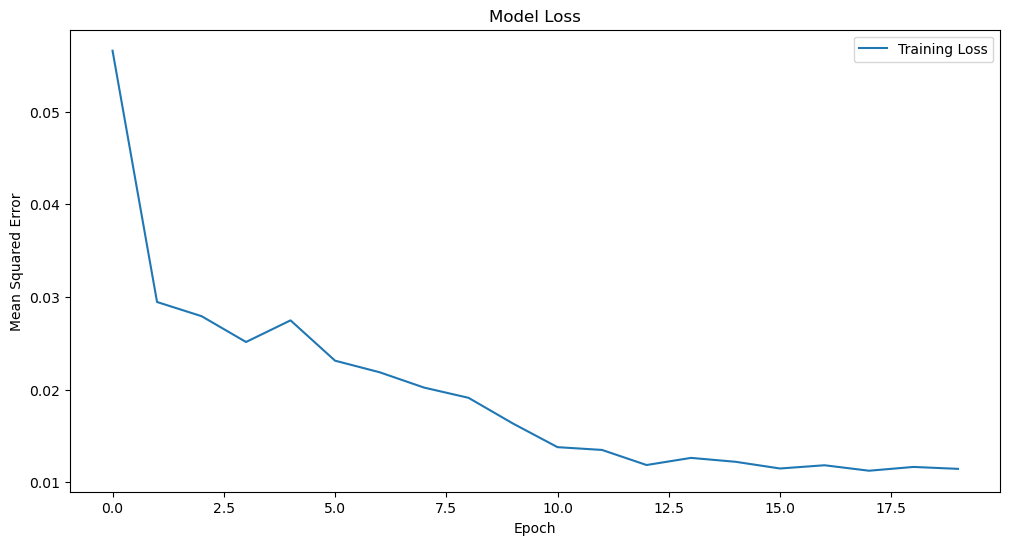

In [233]:
#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(30,return_sequences = True,input_shape = (x_train.shape[1],1)))
# regressorLSTM.add(Dropout(0.4))

regressorLSTM.add(LSTM(50, return_sequences = False))
# regressorLSTM.add(Dropout(0.2))
# regressorLSTM.add(Dense(25))

#Adding the output layer
regressorLSTM.add(Dense(1))

#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
					loss = 'mean_squared_error',
					metrics = ["accuracy"])

#Fitting the model
history=regressorLSTM.fit(x_train, 
				y_train, 
				batch_size = 1, 
				epochs = 20)
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')  # If validation data is used
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
# plt.grid(True)
plt.show()
# regressorLSTM.summary()


In [228]:
y_LSTM = regressorLSTM.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step


In [229]:
y_LSTM_O = scaler.inverse_transform(y_LSTM)

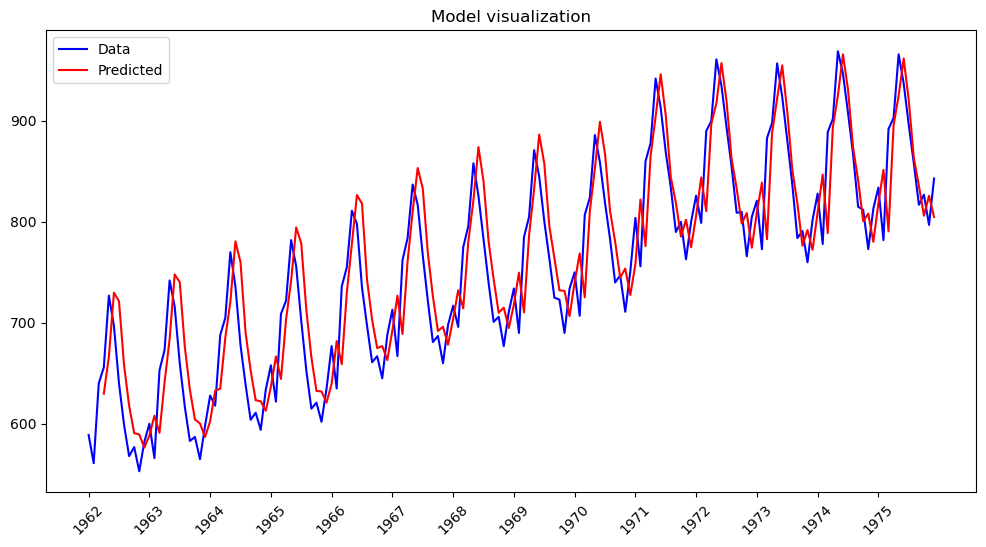

In [230]:
# import matplotlib.dates as mdates
plt.figure(figsize=(12, 6))
plt.plot(train_data.Date, train_data.Production, label = "Data", color = "b")
plt.plot(test_data.Date[3:], y_LSTM_O, label = "Predicted", color = "r")
plt.legend()
plt.title("Model visualization")

date_ticks = train_data.Date[::12]  # Choose appropriate intervals
date_labels = train_data.Year[::12]  # Format labels as years

# Set x-axis ticks and labels
plt.xticks(ticks=date_ticks, labels=date_labels, rotation=45)

plt.show()

In [232]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean Absolute Error
# rmse = np.sqrt(mean_squared_error(y_train, y_LSTM_O))
rmse = np.sqrt(mean_squared_error(y_test, y_LSTM_O))
print(f"Root Mean Squared Error (RMSE): {rmse}")

mse = mean_squared_error(y_test, y_LSTM_O)
print(f" Mean Squared Error (RMSE): {mse}")

r2 = r2_score(y_test, y_LSTM)
# r2 = r2_score(y_train, y_LSTM)
print(f"R2 score is {r2}")

Root Mean Squared Error (RMSE): 769.2927206829579
 Mean Squared Error (RMSE): 591811.2900957875
R2 score is 0.8219700488511181
